# Examen Módulo 2

**Mantenga la calma y lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen2_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen2_MoralesGabriel*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`+`B`) o (`Esc`+`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor absténgase de preguntar.

# ANTES DE EMPEZAR

Escribe tu número de expediente como semilla

In [1]:
import numpy as np
np.random.seed(745986)
print("Integración Monte Carlo tipo 1 - Problema ", np.random.choice([1, 2]))
print("Integración Monte Carlo tipo 2 - Problema ", np.random.choice([1, 2]))

Integración Monte Carlo tipo 1 - Problema  2
Integración Monte Carlo tipo 2 - Problema  2


---
### Caminata aleatoria

Una persona entra a un casino con 20 pesos.

Su apuesta inicial es de 10 pesos, y tiene la idea de modificar su apuesta de la siguiente manera:
- Si gana, disminuye su apuesta en 2 pesos
- Si pierde, aumenta su apuesta en 2 pesos

Este jugador apostará hasta que haya ganado lo suficiente para que su apuesta se vuelva 0 o cuando quede en bancarrota.

1. ¿Cuál es el capital esperado?
2. En promedio, ¿cuánto apostará en el tercer juego?
3. ¿Cuál es la probabilidad de que quede en bancarrota?
4. ¿Cuál es la probabilidad de que "gane"? (Que su apuesta se vuelva cero)

In [75]:
#Aquí el "dado" sólo es 1 o 0, osea ganar o perder. 
import numpy as np 
import random 

def juego(c0=20, a0=10): #no necesito n pq no sé cuántas rondas van a ser, me lo dirá la función. 
    camino_capital = [c0] #en el examen me faltó poner el camino, no era solo regresar la respuesta de si quiebra o gana 
    capital = camino_capital[-1] 
    jugadas = 0
    while True: #Para cuando la apuesta sea 0 o cuando el capital sea 0, no se si ponerle or o and, mejor le pongo return cuando sí se cumpla  
        gana = np.random.choice([0,1])
        if gana == 1: 
            capital = camino_capital[-1] +a0
            camino_capital.append(capital) 
            a0 -= 2 
            jugadas += 1
        if capital <= 0:
            resultado = "quiebra" 
            return np.array(camino_capital), resultado, capital, a0, jugadas  
        if a0== 0:
            resultado = "gano" 
            return np.array(camino_capital), resultado, capital, a0, jugadas 
        if gana == 0: 
            capital = camino_capital[-1] -a0
            camino_capital.append(capital) 
            a0 += 2
            jugadas += 1 
        if capital <= 0:
            resultado = "quiebra" 
            return np.array(camino_capital), resultado, capital, a0, jugadas 
        if a0 == 0:
            resultado = "gano" 
            return np.array(camino_capital), resultado, capital, a0, jugadas 
        


In [118]:
juego()

(array([20, 10, -2]), 'quiebra', -2, 14, 2)

In [109]:
def capital_esperado(n):
    lista = [] 
    for i in range(n): 
        _, resultado, capital,_, _ = juego()
        if resultado == "gano":
            lista.append(capital)
    respuesta = (np.array(lista)).mean()
    return respuesta 
    

In [113]:
capital_esperado(100000)

65.61968446953249

Ese sería el resultado de lo que yo interpreto como "capital final esperado", es decir, en los casos donde hubo capital final cuál fue el promedio. Pero si se quisiera el capital final incluyendo TODOS los casos, entonces: 

In [120]:
def capital_esperado_todo(n):
    lista = [] 
    for i in range(n): 
        _, _, capital,_, _ = juego()
        lista.append(capital)
    respuesta = (np.array(lista)).mean()
    return respuesta 
    

In [122]:
capital_esperado_todo(100000)

19.78964

In [141]:
def tercer_juego(c0=20, a0=10): 
    camino_capital = [c0] 
    capital = camino_capital[-1] 
    jugadas = 0
    while True: 
        gana = np.random.choice([0,1])
        if gana == 1: 
            capital = camino_capital[-1] +a0
            camino_capital.append(capital) 
            a0 -= 2 
            jugadas += 1
        if jugadas == 3: 
            return a0
        if gana == 0: 
            capital = camino_capital[-1] -a0
            camino_capital.append(capital) 
            a0 += 2
            jugadas += 1 
        if jugadas == 3:
            return a0
       


In [149]:
def sim_tercer_juego(n):
    lista = [] 
    for i in range(n): 
        respuesta = tercer_juego()
        lista.append(respuesta)
    return (np.array(lista)).mean()
    

In [155]:
sim_tercer_juego(100000)

9.9806

La apuesta promedio en el tercer juego sería de 9.98 

In [126]:
#La prob de que quede en bancarrota sería: 

def probs(n):
    lista = []
    for i in range(n):
        _,resultado,_,_,_ = juego()
        lista.append(resultado)
    prob_quiebra = (np.array(lista)=="quiebra").mean()
    prob_gana = (np.array(lista)=="gano").mean()
    return prob_quiebra, prob_gana

In [138]:
probs(1000000)

(0.655141, 0.344859)

La probabilidad de que quede en bancarrota sería del 65% aproximadamente y la probabilidad de que gane (apuesta se convierta en 0) sería del 34% aproximadamente. 

---
### Simulación Monte Carlo

Jugadores A y B están jugando a tirar una moneda sesgada (60\% de probabilidad de caer en águila) por turnos. El jugador A empieza el juego y luego va el jugador B. Se lanza la moneda por turnos hasta que alguien tira águila y gana. ¿Cuál es la probabilidad de que el jugador A gane?

In [36]:
#el orden importa 

def una_tirada():
    A = "sello"
    B = "sello" 
    while (A != "aguila") and (B != "aguila"): #& ? 
        A = np.random.choice(["aguila","sello"], p = [0.6, 0.4])
        if A == "aguila":
            return "A" 
        else: 
            B = np.random.choice(["aguila","sello"], p = [0.6, 0.4]) 
            if B == "aguila":
                return "B" 

In [48]:
una_tirada() 

'A'

In [50]:
def simulaciones(n):
    lista = [] 
    for i in range(n):
        resultado = una_tirada()
        lista.append(resultado)
    prob = (np.array(lista) == "A").mean()
    return prob 
    
    

In [52]:
simulaciones(100000)

0.7135

---
### Integración Monte Carlo tipo 1 - Problema 1
$$ f_1(x) = 5\frac{\sin{x}}{x} $$
$$ f_2(x) = \frac{1}{8} $$

Dadas $f_1$ y $f_2$, ¿cuál es el área que hay entre las dos curvas en un intervalo de $[0.1, 7]$? (Aproxima los cruces)

In [159]:
def funcion1(x):
    return 5*((np.sin(x))/(x))
def funcion2(x):
    return 1/8 
#quiero el total del area azul en la imagen 
#tendré que hacer 3 integraciones 

def int_tipo1(f, a, b, n):
    u = np.random.uniform(a,b,n)
    return np.mean(f(u)*(b-a))

#Para la primer región es el área de f1 - área de f2 
region_1 = int_tipo1(funcion1, 0.1, 3.1, 100000) - int_tipo1(funcion2, 0.1, 3.1, 100000)

#Para segunda región es el área de f2 - área de f1
region_2 = int_tipo1(funcion2, 3.1, 6.5, 100000) - int_tipo1(funcion1, 3.1, 6.5, 100000)

#Para tercer región es área de f1 - área de f2 
region_3 = int_tipo1(funcion1, 6.5, 7, 100000) - int_tipo1(funcion2, 6.5, 7, 100000)

#Al final se suma todo 
region_1 + region_2 + region_3

11.06763351781697

In [161]:
print("Aproximadamente el área que hay entre las 2 curvas en el intervalo [0.1,7] es de ", region_1 + region_2 + region_3)

Aproximadamente el área que hay entre las 2 curvas en el intervalo [0.1,7] es de  11.06763351781697


### Integración Monte Carlo tipo 1 - Problema 2
$$ f_1(x) = \sin{(x)} e^{-x} $$
$$ f_2(x) = \frac{x}{10} $$

Dadas $f_1$ y $f_2$, ¿cuál es el área que hay entre las dos curvas en un intervalo de $[0, 4]$? (Aproxima los cruces)

In [60]:

def f1(x):
    return np.sin(x)*np.exp(-x) 
def f2(x):
    return x/10
#quiero el total del area azul en la imagen 

def montecarlo_tipo1(f, a, b, n):
    u = np.random.uniform(a,b,n)
    return np.mean(f(u)*(b-a))


In [68]:
montecarlo_tipo1(f1,0,1.75,100000) 

0.42987568809859295

In [70]:
montecarlo_tipo1(f2,0,1.75,100000) 

0.15313328955383823

In [74]:
#funcion 1 menos funcion 2 
primera_parte_azul = montecarlo_tipo1(f1,0,1.75,100000)  - montecarlo_tipo1(f2,0,1.75,100000) 
primera_parte_azul

0.2768011577816703

In [76]:
montecarlo_tipo1(f1,1.75,4,100000) 

0.08343411109060545

In [78]:
montecarlo_tipo1(f2,1.75,4,100000) 

0.6469177142710505

In [80]:
#ahora funcion 2 menos funcion 1 
segunda_parte_azul = montecarlo_tipo1(f2,1.75,4,100000)  - montecarlo_tipo1(f1,1.75,4,100000)  
segunda_parte_azul

0.5636319192725863

In [82]:
#AREA TOTAL DE LA FIGURA EN AZUL 
primera_parte_azul + segunda_parte_azul 

0.8404330770542565

---
### Integración Monte Carlo tipo 2 - Problema 1

Se tienen las siguientes desigualdades:

1.
$$ ((\frac{x}{4})^2 + (\frac{y-1}{2.5})^2 < 1)\ \& \ ((x+1.5)^2 + (y-1)^2 > 0.2) \ \& \ ((x-1.5)^2 + (y-1)^2 > 0.2) $$


2. $$ (x+3)^2 + (y-4)^2 < 2 $$


3. $$ (x-3)^2 + (y-4)^2 < 2 $$

4. $$ x^2 + (\frac{y+5}{2})^2 < 8 $$

1. Crea una función de Python para cada desigualdad.

In [163]:
def desigualdad1(x,y): #acuerdate del () entre los &, es super importante 
    return ((x/4)**4 + ((y-1)/(2.5))**2 <1)&( (x+1.5)**2 + (y-1)**2 > 0.2 )&( (x-1.5)**2 + (y-1)**2 > 0.2)

def desigualdad2(x,y):
    return (x+3)**2 + (y-4)**4 < 2

def desigualdad3(x,y):
    return (x-3)**2 + (y-4)**2 <2 

def desigualdad4(x,y):
    return x**2 + ((y+5)/(2))**2 <8 

2. Crea una función que agrupe estas desigualdades (utiliza el operador `|` para unir las desigualdades)

In [191]:
def funcion_agrupadora(x,y):
    return (((x/4)**4 + ((y-1)/(2.5))**2 < 1) & 
            ((x+1.5)**2 + (y-1)**2 > 0.2) & 
            ((x-1.5)**2 + (y-1)**2 > 0.2)) | \
           (((x+3)**2 + (y-4)**4 < 2) | 
            ((x-3)**2 + (y-4)**2 < 2) | 
            (x**2 + ((y+5)/(2))**2 < 8))

# este \ es como el \n que se ponía para saltar de línea, pero en este caso lo pong para no tener que escribir todo junto en una misma línea 

3. Encuentra los límites de integración

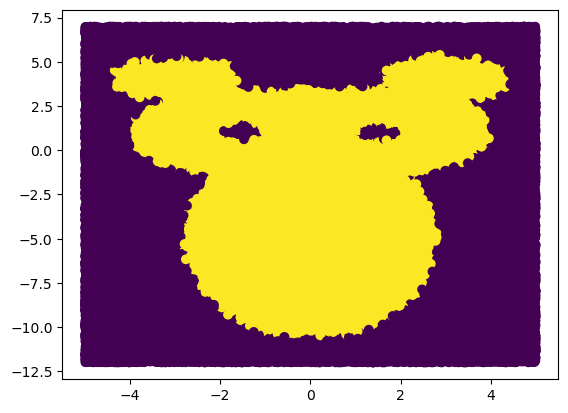

In [201]:
#limites al tanteo 
ax2 = -5
bx2 = 5
ay2 = -12
by2 = 7 

n2 = 100000
x = np.random.uniform(ax, bx, n2)
y = np.random.uniform(ay, by, n2)
import matplotlib.pyplot as plt 
plt.figure()
plt.scatter(x,y, c=funcion_agrupadora(x,y))

4. Aproxima el área de la región descrita por la agrupación de las desigualdades con 1 millón de puntos.

In [199]:
def tipo2(region, ax, bx, ay, by, n):
    x = np.random.uniform(ax,bx,n)
    y = np.random.uniform(ay,by,n)
    AR = (bx-ax) * (by-ay)
    return np.mean(region(x,y)) * AR 

    

In [215]:
AD = tipo2(funcion_agrupadora, ax2, bx2, ay2, by2, 1000000)
AD 

88.34316

5. ¿Cuál es el error relativo?

In [217]:
AR2 = (bx2-ax2)*(by2-ay2)
Crel = np.sqrt((1-AD/AR2)/(AD/AR2))
Erel = np.log10(Crel) - np.log10(1000000)/2
Erel 

-2.9695181620988937

In [219]:
print("El error relativo aproximado es de: ", Erel)

El error relativo aproximado es de:  -2.9695181620988937


### Integración Monte Carlo tipo 2 - Problema 2

Se quiere calcular el volumen de una alberca donde su superficie está dada por la siguiente desigualdad:
$$ (x^2 + (\frac{y}{2})^2 \leq 1)\ | \ ((x-1)^2 + (y+2)^2 \leq 2) $$

1. Define una función en Python para la desigualdad y utilízala para encontrar límites de integración adecuados para esta superficie.

In [86]:
def func1(x,y):
    return (x**2 + (y/2)**2 <= 1) | ((x-1)**2 + (y+2)**2 <= 2 ) 
    

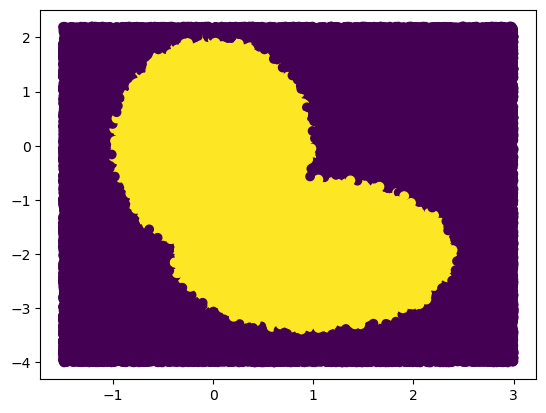

In [94]:
#limites al tanteo 
ax = -1.5
bx = 3
ay = -4
by = 2.2

n = 100000
x = np.random.uniform(ax, bx, n)
y = np.random.uniform(ay, by, n)
import matplotlib.pyplot as plt 
plt.figure()
plt.scatter(x,y, c=func1(x,y))

La profundidad de la alberca debe ser de $1.35$ metros. En otras palabras

$$ (z \leq 0)\ \& \ (z \geq -1.35)$$

2. Define una función para esta desigualdad de profundidad.

In [122]:
def profundidad(z):
    return (z <= 0) & (z >= -1.35)
#quiero que me de tmbn true or false

In [124]:
profundidad(-3)

False

3. Define una función que agrupe estas desigualdades (utiliza el operador `&` para unir las desigualdades)

In [202]:
def agrupar(x,y,z):
    return func1(x, y) & profundidad(z)


In [211]:
az = -1.35
bz = 0

4. Aproxima el volumen.

In [214]:
def montecarlo_tipo2(region, ax, bx, ay, by, az, bz, n):
    x = np.random.uniform(ax, bx, n)
    y = np.random.uniform(ay, by, n)
    z = np.random.uniform(az, bz, n)
    AR = (bx-ax)*(by-ay)*(bz-az) #la z con la resta se vuelve distancia positiva 
    return np.mean(region(x,y,z))*AR 

    

In [216]:
montecarlo_tipo2(agrupar, ax, bx, ay, by, az, bz, 100000)

15.512330250000002